Note: this tutorial is a fork with some additions and changes from Valetin Haenel's tutorial on SciPy

# Numerical operations on arrays

### Section contents

* Elementwise operations
* Basic reductions
* Broadcasting
* Array shape manipulation
* Sorting data
* Summary


In [2]:
%matplotlib inline
import numpy as np

## Elementwise operations

### Basic operations

With scalars:


In [ ]:
a = np.array([1, 2, 3, 4])
a + 1

In [ ]:
2**a

All arithmetic operates elementwise by default:


In [ ]:
b = np.ones(4) + 1
a - b

In [ ]:
a * b

In [ ]:
j = np.arange(5)
2**(j + 1) - j

Again, the reason we use numpy is the fact that operations on numpy arrays are **much faster** than if you did them in pure python:


In [ ]:
a = np.arange(10000)
%timeit a + 1  

In [ ]:
l = range(10000)
%timeit [i+1 for i in l] 

### Warning

**Array multiplication is not matrix multiplication:**


In [4]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

### Specific commands needed for matrix operations

**Matrix multiplication:**


In [ ]:
c.dot(c)

### Other operations

Comparisons:


In [5]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [6]:
a > b

array([False, False,  True, False])

Logical operations:


In [7]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [8]:
np.logical_and(a, b)

array([ True, False, False, False])

Transcendental functions:


In [12]:
a = np.arange(1,10)
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [13]:
np.log(a)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458])

In [14]:
np.exp(a)

array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
       1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
       8.10308393e+03])

Shape mismatches


In [15]:
a = np.arange(4)
a + np.array([1, 2])  

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

The resulting error mentions **Broadcasting?** - the extension method we mentioned earlier and will return to below...


Transposition:


In [16]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [17]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

### Tip

Array-wise comparisons can be done using array_equal, which returns the overall comparison:


In [18]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [19]:
np.array_equal(a, c)

True

## Note

**Linear algebra**


Although the sub-module ``numpy.linalg`` implements some basic linear algebra methods, such as solving linear systems, singular value decomposition, etc. their use is not recommended, since they may not use the most efficient routines. Please use ``scipy.linalg`` from the ``scipy`` package instead!!


## Basic reductions

Computing sums:


In [20]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [21]:
x.sum()

10

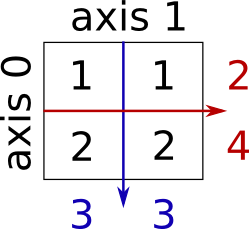

In [22]:
from IPython.display import Image
Image(filename='images/reductions.png')

Sum by rows and by columns:


In [23]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [25]:
x.sum(axis=0)   # columns (first dimension)

array([3, 3])

In [26]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [27]:
x.sum(axis=1)   # rows (second dimension)

array([2, 4])

In [28]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

## Tip

Same idea in higher dimensions:


In [32]:
x = np.random.rand(2, 2, 2)
x.sum(axis=2)[0, 1]

1.1369531544150888

In [33]:
x[0, 1, :].sum()     

1.1369531544150888

### Other reductions

--- work the same way (use `axis=`)


Statistics:


In [ ]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

In [ ]:
np.median(x)

In [ ]:
np.median(y, axis=-1) # last axis

In [ ]:
x.std()          # full population standard dev.

Finding minimum and maximum values:


In [ ]:
x = np.array([1, 3, 2])
x.min()

In [ ]:
x.max()

In [ ]:
x.argmin()  # index of minimum

In [ ]:
x.argmax()  # index of maximum

Logical operations:


In [ ]:
np.all([True, True, False])

In [ ]:
np.any([True, True, False])

### Note

These functions can be used for array comparisons:


In [ ]:
a = np.zeros((100, 100))
np.any(a != 0)

In [ ]:
np.all(a == a)

In [ ]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

... and many more (best to learn as you go).


### Worked Example: data statistics

Data in `data/populations.txt`
describes the populations of hares and lynxes (and carrots) in northern
Canada during 20 years.


You can view the data in an editor, or alternatively in IPython (both
shell and notebook) by making use of the "!" escape command:


In [ ]:
!cat data/populations.txt

First, load the data into a Numpy array using the function **loadtxt( )** that can be used to import standard tab-delimited files easily:


In [ ]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

Then plot it:


In [ ]:
from matplotlib import pyplot as plt
#plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))
plt.show()

The mean populations over time:


In [ ]:
populations = data[:, 1:]
populations.mean(axis=0)

The sample standard deviations:


In [ ]:
populations.std(axis=0)

Which species has the highest population each year?:


In [ ]:
np.argmax(populations, axis=1)

In [ ]:
populations

## Loading data - more flexible ways

If  **loadfromtxt( )** is not sufficient, then you can use **genfromtxt( )**, which provides a more flexible frontend for reading files. 

numpy.genfromtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

## Broadcasting / array extension

* Basic operations on `numpy` arrays (addition, etc.) are elementwise

* This works on arrays of the same size.


The image below gives an example of broadcasting:


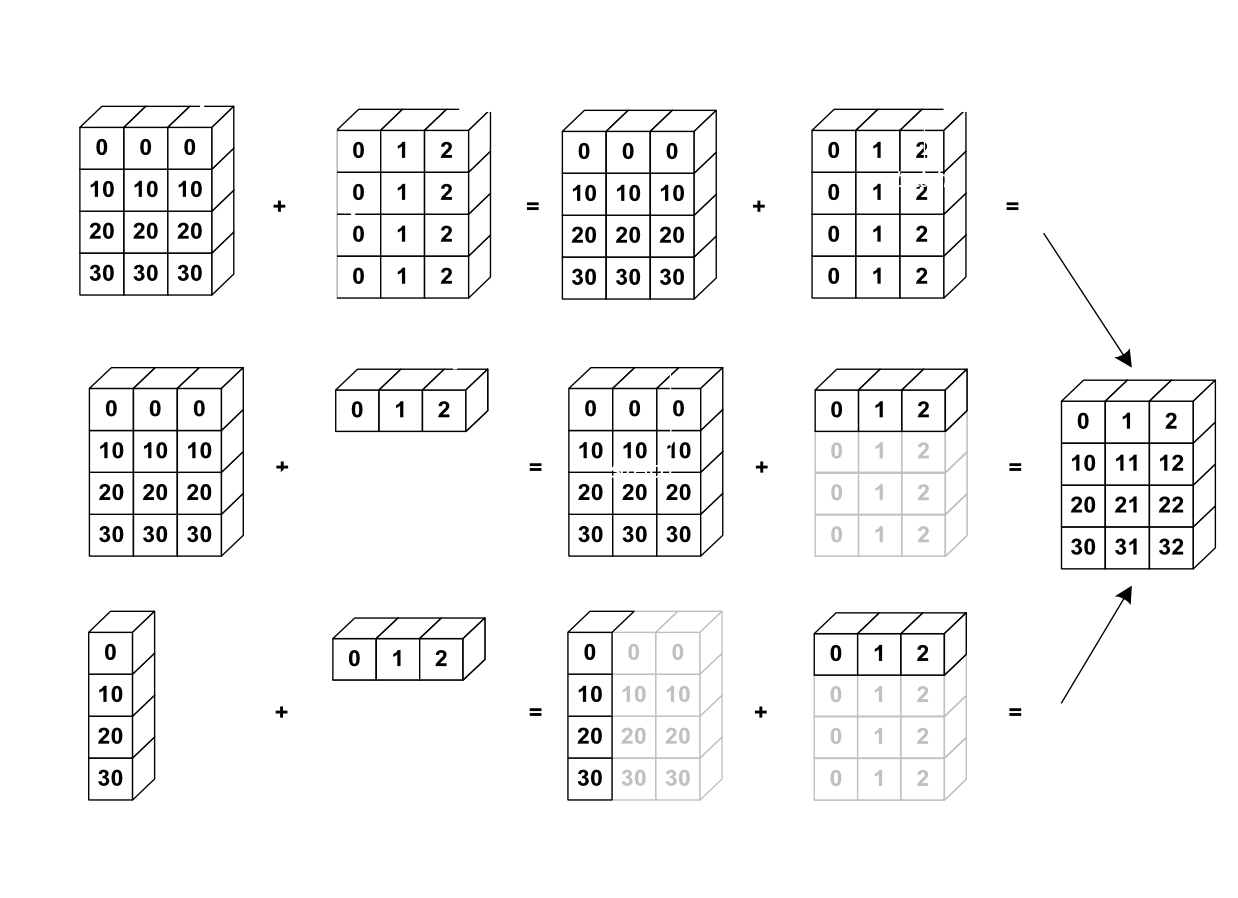

In [34]:
from IPython.display import Image
Image(filename='images/numpy_broadcasting.png')

Let's verify:


In [35]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [36]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

We have already used broadcasting without knowing it!:


In [37]:
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

A useful trick with which to extend one array by another, which we have already used:

In [38]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [40]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape

(4, 1, 1)

In [41]:
a

array([[[ 0]],

       [[10]],

       [[20]],

       [[30]]])

In [42]:
a + b

array([[[ 0,  1,  2]],

       [[10, 11, 12]],

       [[20, 21, 22]],

       [[30, 31, 32]]])

## Tip

Broadcasting seems a bit magical, but it is actually quite natural to
use it when we want to solve a problem whose output data is an array
with more dimensions than input data.


## Worked Example: Broadcasting

Let's construct an array of distances (in miles) between cities of Route
66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo,
Santa Fe, Albuquerque, Flagstaff and Los Angeles.


In [43]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,
       1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

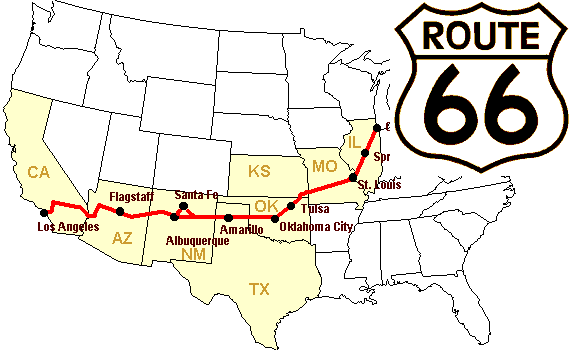

In [44]:
from IPython.display import Image
Image(filename='images/route66.png')

A lot of grid-based or network-based problems can also use broadcasting.
For instance, if we want to compute the distance from the origin of
points on a 5x5 grid, we can do


In [46]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

Or in color:


In [47]:
plt.pcolor(distance)    
plt.colorbar()    
plt.show()

NameError: name 'plt' is not defined

**Remark** : the `numpy.ogrid` function allows to directly create
vectors x and y of the previous example, with two "significant
dimensions":


In [48]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [49]:
x.shape, y.shape

((5, 1), (1, 5))

In [50]:
distance = np.sqrt(x ** 2 + y ** 2)

## Tip

So, `np.ogrid` is very useful as soon as we have to handle computations
on a grid. On the other hand, `np.mgrid` directly provides matrices full
of indices for cases where we can't (or don't want to) benefit from
broadcasting:


In [51]:
x, y = np.mgrid[0:5, 0:5]
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [52]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

## Array shape manipulation

### Flattening

In [53]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [54]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [55]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out "first".


### Reshaping

The inverse operation to flattening:


In [56]:
a.shape

(2, 3)

In [57]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

Or,


In [58]:
a.reshape((2, -1))    # unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

### Warning

`ndarray.reshape` **may** return a view (cf `help(np.reshape)`)), or
copy


### Tip

In [60]:
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

Beware: reshape may also return a copy!:


In [61]:
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

To understand this you need to learn more about the memory layout of a
numpy array.


### Adding a dimension

Indexing with the `np.newaxis` object allows us to add an axis to an
array (you have seen this already above in the broadcasting section):


In [ ]:
z = np.array([1, 2, 3])
z

In [ ]:
z[:, np.newaxis]

In [ ]:
z[np.newaxis, :]

### Dimension shuffling

In [62]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [63]:
a[0, 2, 1]

5

In [64]:
b = a.transpose(1, 2, 0)
b.shape

(3, 2, 4)

In [65]:
b[2, 1, 0]

5

Also creates a view:


In [ ]:
b[2, 1, 0] = -1
a[0, 2, 1]

### Resizing

Size of an array can be changed with `ndarray.resize`:


In [82]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

However, it must not be referred to somewhere else:

In [93]:
a = np.arange(4)
b = a.copy()
a.resize((5,))

## Sorting data

Sorting along an axis:


In [ ]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

## Note

Sorts each row separately!


In-place sort:


In [ ]:
a.sort(axis=1)
a

Sorting with fancy indexing:


In [ ]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

In [ ]:
a[j]

Finding minima and maxima:


In [95]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

## Summary

**What do you need to know to get started?**


* Know how to create arrays : `array`, `arange`, `ones`, `zeros`.

* Know the shape of the array with `array.shape`, then use slicing to
obtain different views of the array: `array[::2]`, etc. Adjust the shape
of the array using `reshape` or flatten it with `ravel`.

* Obtain a subset of the elements of an array and/or modify their values
with masks


In [96]:
a[a < 2] = 0
print(a)

[4 3 0 2]


* Know miscellaneous operations on arrays, such as finding the mean or max
(`array.max()`, `array.mean()`). No need to retain everything, but have
the reflex to search in the documentation (online docs, `help()`,
`lookfor()`)!!

* For advanced use: master the indexing with arrays of integers, as well
as broadcasting. Know more Numpy functions to handle various array
operations.
